# Soccer Prediction

An endeavor to predict soccer scores


In [7]:
import pandas as pd
import json
import matplotlib


## Playing with Events

In [8]:
df = pd.read_json('data/events_World_Cup.json', orient='records')
df.head()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,1.656214,258612104,2057954,1H,122671,"[{'y': 50, 'x': 50}, {'y': 53, 'x': 35}]",85,Simple pass,[{'id': 1801}],16521
1,8,Pass,4.487814,258612106,2057954,1H,139393,"[{'y': 53, 'x': 35}, {'y': 19, 'x': 75}]",83,High pass,[{'id': 1801}],16521
2,1,Duel,5.937411,258612077,2057954,1H,103668,"[{'y': 81, 'x': 25}, {'y': 83, 'x': 37}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",14358
3,1,Duel,6.406961,258612112,2057954,1H,122940,"[{'y': 19, 'x': 75}, {'y': 17, 'x': 63}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",16521
4,8,Pass,8.562167,258612110,2057954,1H,122847,"[{'y': 17, 'x': 63}, {'y': 15, 'x': 71}]",85,Simple pass,[{'id': 1801}],16521


In [14]:
df.describe()

,eventId,eventSec,id,matchId,playerId,teamId
count,101759.000000,101759.000000,1.017590e+05,1.017590e+05,101759.000000,101759.000000
mean,5.749772,1388.637801,2.611401e+08,2.057986e+06,86281.211922,10375.224589
std,3.115089,850.980508,4.062610e+06,1.866148e+01,100669.835706,5170.481351
min,1.000000,0.122553,2.586121e+08,2.057954e+06,12.000000,1598.000000
25%,1.000000,643.469486,2.593947e+08,2.057970e+06,10131.000000,6380.000000
50%,8.000000,1356.739817,2.603052e+08,2.057986e+06,51217.000000,9905.000000
75%,8.000000,2115.778717,2.610949e+08,2.058003e+06,116166.000000,15594.000000
max,10.000000,3258.366837,2.802175e+08,2.058017e+06,552555.000000,19314.000000


In [29]:
result = df.groupby('eventName')['id'].count().reset_index(name='count')
result['count'] = result['count'] / result['count'].max() * 100
result['count'] = result['count'] / result['count'].sum()

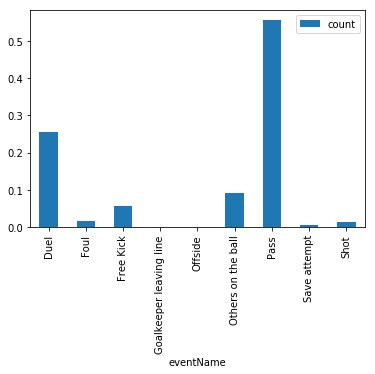

In [30]:
result.plot.bar(x='eventName', y='count')

In [42]:
df.groupby('matchId').apply(lambda x: x.sort_values(by='eventSec'))

eventId                eventName     eventSec         id  \
matchId                                                                    
2057954 0             8                     Pass     1.656214  258612104   
        788           8                     Pass     3.346688  258613014   
        1             8                     Pass     4.487814  258612106   
        2             1                     Duel     5.937411  258612077   
        3             1                     Duel     6.406961  258612112   
        789           8                     Pass     6.960515  258613016   
        4             8                     Pass     8.562167  258612110   
        791           1                     Duel     9.599077  258613216   
        790           1                     Duel     9.599077  258613023   
        5             8                     Pass    10.991292  258612113   
        792           8                     Pass    13.166663  258613220   
        6             1                     Duel    14.081637  258612115   
        7             8                     Pass    15.039163  258612116   
        8             8                     Pass    16.438878  258612117   
        9             8                     Pass    17.745299  258612119   
        793           8                     Pass    18.472908  258613224   
        10            8                     Pass    19.097188  258612120   
        794           8                     Pass    20.298044  258613027   
        11            1                     Duel    21.564677  258612080   
        12            1                     Duel    21.794490  259141706   
        795           1                     Duel    24.111835  258613229   
        796           1                     Duel    24.111835  260189728   
        797           8                     Pass    25.893597  258613030   
        798           8                     Pass    27.715621  258613031   
        799           8                     Pass    28.365286  258613230   
        800           7       Others on the ball    28.412696  259141713   
        802           1                     Duel    30.136459  258613235   
        801           1                     Duel    30.136459  258613033   
        803           8                     Pass    34.948923  258613035   
        13            3                Free Kick    36.815886  258612125   
...                 ...                      ...          ...        ...   
2058017 101730        1                     Duel  2878.987642  263885581   
        101731        1                     Duel  2878.987642  263885645   
        101732        8                     Pass  2879.689994  263885635   
        101733        8                     Pass  2881.097862  263885636   
        101734        7       Others on the ball  2883.170006  263885638   
        101735        8                     Pass  2886.429661  263885639   
        101736        8                     Pass  2888.451480  263885640   
        101737        1                     Duel  2889.705526  263885584   
        101738        1                     Duel  2889.705526  263885648   
        101739        7       Others on the ball  2891.611486  263885593   
        101740        8                     Pass  2897.301099  263885642   
        101741        8                     Pass  2900.173508  263885644   
        101743        1                     Duel  2903.706595  263885668   
        101742        1                     Duel  2903.706595  263885586   
        100947        3                Free Kick  2905.875147  263884688   
        101744        2                     Foul  2906.751747  263885591   
        101745        1                     Duel  2919.788786  263885598   
        101746        1                     Duel  2919.788786  263885655   
        101747        3                Free Kick  2955.453225  263885605   
        101748        1                     Duel  2957.224360  2

3258.3668369999996